In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkConf
conf = SparkConf() \
  .setAppName("Telecom Data analysis") \
  .set("spark.executor.memory", "8g")
spark = SparkSession \
 .builder \
 .config(conf=conf) \
 .getOrCreate()

In [0]:
# Charger le DataFrame Spark à partir des données
df_telecomdata = spark.read.format("csv").option("header", "True").option("delimiter", ";").option("index_col","False").load("/FileStore/tables/TelecomData")
# Afficher le DataFrame
df_telecomdata.show(3)


+---+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
| ID|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation electronique|   Mode de paiement|charges mensuelles|Charges totales|Desabonnement|
+---+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|  1|Femme|     0|    Non|         1|         Non|             DSL|            Non|       Oui|Mensuel|                     Oui|Cheque electronique|             29,85|          29,85|          Non|
|  2|Homme|     0|    Non|        34|         Non|             DSL|            Oui|       Non| Annuel|                     Non|      Cheque papier|             56,95|         1889,5|          Non|
|  3|Homme|    

In [0]:
df_telecomdata.select("Charges mensuelles", "Charges totales").distinct().show()

+------------------+---------------+
|Charges mensuelles|Charges totales|
+------------------+---------------+
|             29,85|          29,85|
|            100,35|         5681,1|
|             20,15|          20,15|
|             49,95|         587,45|
|             56,95|         1889,5|
|              70,7|         151,65|
|             56,15|        3487,95|
|             90,05|         1862,9|
|              19,8|         202,25|
|             18,95|          326,8|
|             53,85|         108,15|
|              89,1|         1949,4|
|              42,3|        1840,75|
|              55,2|         528,35|
|             99,65|          820,5|
|             105,5|        2686,05|
|             106,7|        7382,25|
|             103,7|         5036,3|
|             39,65|          39,65|
|             20,65|        1022,95|
+------------------+---------------+
only showing top 20 rows



In [0]:
# Utilisation de Pandas pour l'affichage, convertion du dataframe
pandas_telecomdata = df_telecomdata.toPandas()
print(pandas_telecomdata.shape)
pandas_telecomdata.head(3)

(5986, 15)


,ID,Genre,Senior,Enfants,Anciennete,Multi-lignes,Service Internet,Autres Services,Partenaire,Contrat,Facturation electronique,Mode de paiement,charges mensuelles,Charges totales,Desabonnement
0,1,Femme,0,Non,1,Non,DSL,Non,Oui,Mensuel,Oui,Cheque electronique,"29,85","29,85",Non
1,2,Homme,0,Non,34,Non,DSL,Oui,Non,Annuel,Non,Cheque papier,"56,95","1889,5",Non
2,3,Homme,0,Non,2,Non,DSL,Oui,Non,Mensuel,Oui,Cheque papier,"53,85","108,15",Oui


## Analyse Exploratoire des Données (EDA) avant le pretraitement

In [0]:
# Suppression de la colonne 'ID' du DataFrame Spark
df_telecomdata = df_telecomdata.drop('ID')
df_telecomdata.show(3)

+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation electronique|   Mode de paiement|charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Femme|     0|    Non|         1|         Non|             DSL|            Non|       Oui|Mensuel|                     Oui|Cheque electronique|             29,85|          29,85|          Non|
|Homme|     0|    Non|        34|         Non|             DSL|            Oui|       Non| Annuel|                     Non|      Cheque papier|             56,95|         1889,5|          Non|
|Homme|     0|    Non|         2|  

In [0]:
# Explorer les statistiques descriptives
descriptive_stats = df_telecomdata.describe()

# Afficher les statistiques descriptives
descriptive_stats.show()


+-------+-----+-------------------+-------+-----------------+------------+----------------+---------------+----------+-------+------------------------+-----------------+------------------+-----------------+-------------+
|summary|Genre|             Senior|Enfants|       Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation electronique| Mode de paiement|charges mensuelles|  Charges totales|Desabonnement|
+-------+-----+-------------------+-------+-----------------+------------+----------------+---------------+----------+-------+------------------------+-----------------+------------------+-----------------+-------------+
|  count| 5986|               5986|   5986|             5986|        5986|            5986|           5986|      5986|   5986|                    5986|             5986|              5985|             5975|         5986|
|   mean| null|0.16254594052789842|   null|32.48179084530571|        null|            null|           null|      nul

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

## Prétraitement des Données
---
### Gestion valeurs manquantes / convertion de certaines colonnes

In [0]:
new_column_names = ['Genre', 'Senior', 'Enfants', 'Anciennete', 'Multi-lignes', 'Service Internet', 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement', 'Charges mensuelles', 'Charges totales', 'Desabonnement']

# Renommage des colonnes
for old_name, new_name in zip(df_telecomdata.columns, new_column_names):
    df_telecomdata = df_telecomdata.withColumnRenamed(old_name, new_name)

# Affichage des 10 premières lignes du DataFrame
df_telecomdata.show(10)

+-----+------+-------+----------+------------+----------------+---------------+----------+---------+------------------------+-------------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|  Contrat|Facturation électronique|   Mode de paiement|Charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+---------+------------------------+-------------------+------------------+---------------+-------------+
|Femme|     0|    Non|         1|         Non|             DSL|            Non|       Oui|  Mensuel|                     Oui|Cheque electronique|             29,85|          29,85|          Non|
|Homme|     0|    Non|        34|         Non|             DSL|            Oui|       Non|   Annuel|                     Non|      Cheque papier|             56,95|         1889,5|          Non|
|Homme|     0|    Non|   

In [0]:
df_telecomdata.columns


Out[291]: ['Genre',
 'Senior',
 'Enfants',
 'Anciennete',
 'Multi-lignes',
 'Service Internet',
 'Autres Services',
 'Partenaire',
 'Contrat',
 'Facturation électronique',
 'Mode de paiement',
 'Charges mensuelles',
 'Charges totales',
 'Desabonnement']

In [0]:
# Pour obtenir le nombre de lignes
num_rows = df_telecomdata.count()

# Pour obtenir le nombre de colonnes
num_columns = len(df_telecomdata.columns)

# Afficher le nombre de lignes et de colonnes
print("Nombre de lignes:", num_rows)
print("Nombre de colonnes:", num_columns)


Nombre de lignes: 5986
Nombre de colonnes: 14


In [0]:
# Afficher le type de données de chaque colonne
for col_name, col_type in df_telecomdata.dtypes:
    print(f"Column '{col_name}' has data type: {col_type}")


Column 'Genre' has data type: string
Column 'Senior' has data type: string
Column 'Enfants' has data type: string
Column 'Anciennete' has data type: string
Column 'Multi-lignes' has data type: string
Column 'Service Internet' has data type: string
Column 'Autres Services' has data type: string
Column 'Partenaire' has data type: string
Column 'Contrat' has data type: string
Column 'Facturation électronique' has data type: string
Column 'Mode de paiement' has data type: string
Column 'Charges mensuelles' has data type: string
Column 'Charges totales' has data type: string
Column 'Desabonnement' has data type: string


#### Afficher les valeurs uniques des colonnes catégorielles du dataframe spark

In [0]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

#  fonction pour afficher les valeurs uniques de chaque colone du dataframe spark
def display_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe.select(column).distinct().rdd.flatMap(lambda x: x).collect()
        print(f"Unique values in column '{column}': {unique_values}")

# Obtenez les colonnes catégorielles
columns_to_inspect = ['Genre',
                    'Senior',
                    'Enfants',
                    'Multi-lignes',
                    'Service Internet',
                    'Autres Services',
                    'Partenaire',
                    'Contrat',
                    'Facturation électronique',
                    'Mode de paiement',
                    'Desabonnement']
# Utilisez la fonction pour afficher les valeurs uniques

display_unique_values(df_telecomdata, columns_to_inspect)


Unique values in column 'Genre': ['Femme', 'Homme']
Unique values in column 'Senior': ['0', '1']
Unique values in column 'Enfants': ['Oui', 'Non']
Unique values in column 'Multi-lignes': ['Oui', 'Non', 'Ouis']
Unique values in column 'Service Internet': ['Fibre optique', 'Non', 'DSL']
Unique values in column 'Autres Services': ['Oui', 'Non']
Unique values in column 'Partenaire': ['Oui', 'Non']
Unique values in column 'Contrat': ['Annuel', 'Mensuel', 'Bisannuel']
Unique values in column 'Facturation électronique': ['Oui', 'Non']
Unique values in column 'Mode de paiement': ['Virement bancaire', 'Carte bancaire', 'Cheque papier', 'Cheque electronique']
Unique values in column 'Desabonnement': ['Oui', 'Non']


#### Gestion des Colonnes Contradictoires Correction de 'Ouis' à 'Oui' dans la Colonne Multi-lignes
---
Dans le DataFrame initial, une colonne, `Multi-lignes`, semblait contradictoire et potentiellement le résultat d'une faute de frappe ou d'une erreur. Cette erreur a été détectée après avoir utilisé l'encodeur onehot dans notre processus de prétraitement des données, où deux colonnes, `Multi-lignes_Oui` et `Multi-lignes_Ouis`, semblaient contradictoires.

Pour remédier à cette situation, nous avons créé une fonction `remplacer_Ouis_par_oui` spécifiquement conçue pour remplacer les occurrences de 'Ouis' par 'Oui' dans la colonne spécifiée. Cela assure la cohérence des données, notamment lorsque l'encodage onehot est appliqué par la suite.

L'identification et la correction de telles incohérences sont cruciales pour garantir la qualité des données et éviter toute ambiguïté lors de l'utilisation de techniques d'encodage ou de modélisation ultérieures.

In [0]:
from pyspark.sql.functions import when

def remplacer_Ouis_par_oui(dataframe, colonne):
    # Utilisation de la fonction 'when' pour remplacer les valeurs
    dataframe = dataframe.withColumn(colonne, when(dataframe[colonne] == 'Ouis', 'Oui').otherwise(dataframe[colonne]))
    return dataframe

# Appelle de la fonction pour remplacer 'Ouis' par 'Oui' dans la colonne 'Multi-lignes'
df_telecomdata = remplacer_Ouis_par_oui(df_telecomdata, 'Multi-lignes')

# Affichage du du nombre d'occurance de la colonne 'Multi-lignes' après la modification
df_telecomdata.select('Multi-lignes').groupBy('Multi-lignes').count().show()


+------------+-----+
|Multi-lignes|count|
+------------+-----+
|         Oui| 2523|
|         Non| 3463|
+------------+-----+



In [0]:
df_telecomdata.select("Charges mensuelles", "Charges totales").distinct().show()


+------------------+---------------+
|Charges mensuelles|Charges totales|
+------------------+---------------+
|             29,85|          29,85|
|            100,35|         5681,1|
|             20,15|          20,15|
|             49,95|         587,45|
|             56,95|         1889,5|
|              70,7|         151,65|
|             56,15|        3487,95|
|             90,05|         1862,9|
|              19,8|         202,25|
|             18,95|          326,8|
|             53,85|         108,15|
|              89,1|         1949,4|
|              42,3|        1840,75|
|              55,2|         528,35|
|             99,65|          820,5|
|             105,5|        2686,05|
|             106,7|        7382,25|
|             103,7|         5036,3|
|             39,65|          39,65|
|             20,65|        1022,95|
+------------------+---------------+
only showing top 20 rows



In [0]:
df_telecomdata.show(3)

+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation électronique|   Mode de paiement|Charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Femme|     0|    Non|         1|         Non|             DSL|            Non|       Oui|Mensuel|                     Oui|Cheque electronique|             29,85|          29,85|          Non|
|Homme|     0|    Non|        34|         Non|             DSL|            Oui|       Non| Annuel|                     Non|      Cheque papier|             56,95|         1889,5|          Non|
|Homme|     0|    Non|         2|  

#### Affichage du nombre de valeurs manquantes par colonne

In [0]:
from pyspark.sql.functions import col, sum

# Afficher le nombre de valeurs manquantes par colonne
missing_values = df_telecomdata.select([sum(col(column).isNull().cast('int')).alias(column) for column in df_telecomdata.columns])

# Afficher les résultats
print("Nombre de valeurs manquantes par colonne :")
missing_values.show()

print("\nColonnes avec des valeurs manquantes :")
for column in df_telecomdata.columns:
    missing_count = missing_values.select(column).first()[0]
    if missing_count > 0:
        print(f"{column}: {missing_count}")


Nombre de valeurs manquantes par colonne :
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+----------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation électronique|Mode de paiement|Charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+----------------+------------------+---------------+-------------+
|    0|     0|      0|         0|           0|               0|              0|         0|      0|                       0|               0|                 1|             11|            0|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+----------------+------------------+---------------+-------------+


Colon

#### Affichage heatmap des valeurs manquantes en utlisant le dataframe pandas

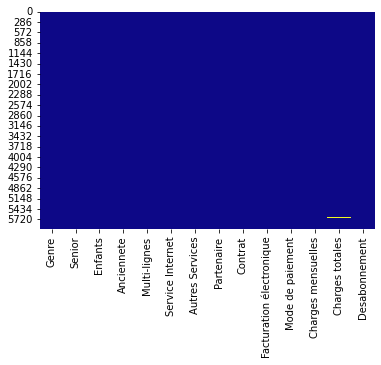

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir le DataFrame Spark en Pandas DataFrame
pandas_df = df_telecomdata.toPandas()

# Afficher une heatmap des valeurs manquantes en utlisant le dataframe pandas
sns.heatmap(pandas_df.isnull(), cbar=False, cmap='plasma')

# Afficher le plot
plt.show()


#### Remplacement des virgules par des points dans les colonnes "Charges mensuelles" et "Charges totales"

In [0]:
from pyspark.sql.functions import col, regexp_replace
from pyspark.sql.types import FloatType

# Remplacer les virgules par des points dans les colonnes "Charges mensuelles" et "Charges totales"
df_telecomdata = df_telecomdata.withColumn("Charges mensuelles", regexp_replace(col("Charges mensuelles"), ",", ".").cast(FloatType()))
df_telecomdata = df_telecomdata.withColumn("Charges totales", regexp_replace(col("Charges totales"), ",", ".").cast(FloatType()))
df_telecomdata.printSchema()
df_telecomdata.show(5)

root
 |-- Genre: string (nullable = true)
 |-- Senior: string (nullable = true)
 |-- Enfants: string (nullable = true)
 |-- Anciennete: string (nullable = true)
 |-- Multi-lignes: string (nullable = true)
 |-- Service Internet: string (nullable = true)
 |-- Autres Services: string (nullable = true)
 |-- Partenaire: string (nullable = true)
 |-- Contrat: string (nullable = true)
 |-- Facturation électronique: string (nullable = true)
 |-- Mode de paiement: string (nullable = true)
 |-- Charges mensuelles: float (nullable = true)
 |-- Charges totales: float (nullable = true)
 |-- Desabonnement: string (nullable = true)

+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation électronique|   Mode de paiement|Charges mensuelles|Charges totales|Des

In [0]:
df_telecomdata.select("Charges mensuelles", "Charges totales").distinct().show()


+------------------+---------------+
|Charges mensuelles|Charges totales|
+------------------+---------------+
|             103.7|         5036.3|
|             18.95|          326.8|
|             20.15|          20.15|
|             39.65|          39.65|
|              42.3|        1840.75|
|             56.95|         1889.5|
|              19.8|         202.25|
|             49.95|         587.45|
|             105.5|        2686.05|
|             99.65|          820.5|
|             20.65|        1022.95|
|              89.1|         1949.4|
|             90.05|         1862.9|
|             29.85|          29.85|
|             53.85|         108.15|
|            113.25|        7895.15|
|            100.35|         5681.1|
|              55.2|         528.35|
|             56.15|        3487.95|
|              70.7|         151.65|
+------------------+---------------+
only showing top 20 rows



#### Conversion des colonnes

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, FloatType

# Convertir la colonne "Senior" en type de données IntegerType
df_telecomdata = df_telecomdata.withColumn("Senior", col("Senior").cast(IntegerType()))

# Convertir la colonne "Anciennete" en type de données IntegerType
df_telecomdata = df_telecomdata.withColumn("Anciennete", col("Anciennete").cast(IntegerType()))

# Convertir les colonnes "charges mensuelles" et "Charges totales" en type de données FloatType
columns_to_convert_float = ['charges mensuelles', 'Charges totales']
for column in columns_to_convert_float:
    df_telecomdata = df_telecomdata.withColumn(column, col(column).cast(FloatType()))

# Afficher le schéma mis à jour
df_telecomdata.printSchema()


root
 |-- Genre: string (nullable = true)
 |-- Senior: integer (nullable = true)
 |-- Enfants: string (nullable = true)
 |-- Anciennete: integer (nullable = true)
 |-- Multi-lignes: string (nullable = true)
 |-- Service Internet: string (nullable = true)
 |-- Autres Services: string (nullable = true)
 |-- Partenaire: string (nullable = true)
 |-- Contrat: string (nullable = true)
 |-- Facturation électronique: string (nullable = true)
 |-- Mode de paiement: string (nullable = true)
 |-- charges mensuelles: float (nullable = true)
 |-- Charges totales: float (nullable = true)
 |-- Desabonnement: string (nullable = true)



In [0]:
df_telecomdata.show(5)

+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation électronique|   Mode de paiement|charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+-------------------+------------------+---------------+-------------+
|Femme|     0|    Non|         1|         Non|             DSL|            Non|       Oui|Mensuel|                     Oui|Cheque electronique|             29.85|          29.85|          Non|
|Homme|     0|    Non|        34|         Non|             DSL|            Oui|       Non| Annuel|                     Non|      Cheque papier|             56.95|         1889.5|          Non|
|Homme|     0|    Non|         2|  

#### Gestion des valeurs manquantes avec Imputer

In [0]:
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col

# Spécifiez les colonnes à imputer
columns_to_impute = ['Anciennete', 'charges mensuelles', 'Charges totales']

# Instanciez l'objet Imputer
imputer = Imputer(strategy='median', inputCols=columns_to_impute, outputCols=columns_to_impute)

# Appliquez l'imputation sur le DataFrame Spark
telecom_df_imputed = imputer.fit(df_telecomdata).transform(df_telecomdata)
telecom_df_imputed.show(10)

+-----+------+-------+----------+------------+----------------+---------------+----------+---------+------------------------+-------------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|  Contrat|Facturation électronique|   Mode de paiement|charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+---------+------------------------+-------------------+------------------+---------------+-------------+
|Femme|     0|    Non|         1|         Non|             DSL|            Non|       Oui|  Mensuel|                     Oui|Cheque electronique|             29.85|          29.85|          Non|
|Homme|     0|    Non|        34|         Non|             DSL|            Oui|       Non|   Annuel|                     Non|      Cheque papier|             56.95|         1889.5|          Non|
|Homme|     0|    Non|   

##### Affichage des valeurs manquantes du dataframe spark apres imputation pour verifier qu'on a plus de valeur manquantes

In [0]:
# Afficher le nombre de valeurs manquantes par colonne après l'imputation
missing_values_after_imputation = telecom_df_imputed.select([sum(col(column).isNull().cast('int')).alias(column) for column in telecom_df_imputed.columns])

# Afficher les résultats
print("Nombre de valeurs manquantes par colonne après imputation :")
missing_values_after_imputation.show()


Nombre de valeurs manquantes par colonne après imputation :
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+----------------+------------------+---------------+-------------+
|Genre|Senior|Enfants|Anciennete|Multi-lignes|Service Internet|Autres Services|Partenaire|Contrat|Facturation électronique|Mode de paiement|charges mensuelles|Charges totales|Desabonnement|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+----------------+------------------+---------------+-------------+
|    0|     0|      0|         0|           0|               0|              0|         0|      0|                       0|               0|                 0|              0|            0|
+-----+------+-------+----------+------------+----------------+---------------+----------+-------+------------------------+----------------+------------------+---------------+-----

### Quelques visualisation pour comprendre nos données avant de les mettre à l'echelle

##### Histogramme pour la variable cible "Desabonnement" pour voir une idée du déséquilibre des classes.

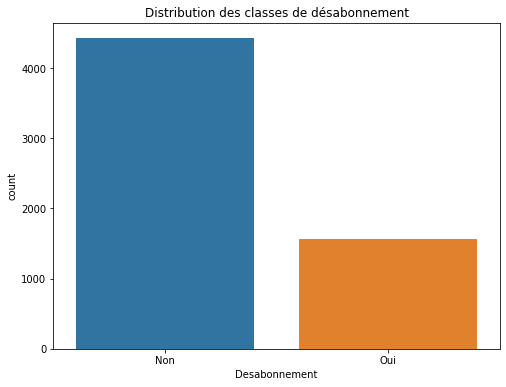

In [0]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Desabonnement', data=telecom_df_imputed.toPandas())
plt.title('Distribution des classes de désabonnement')
plt.show()

##### Histogrammes pour les variables numériques

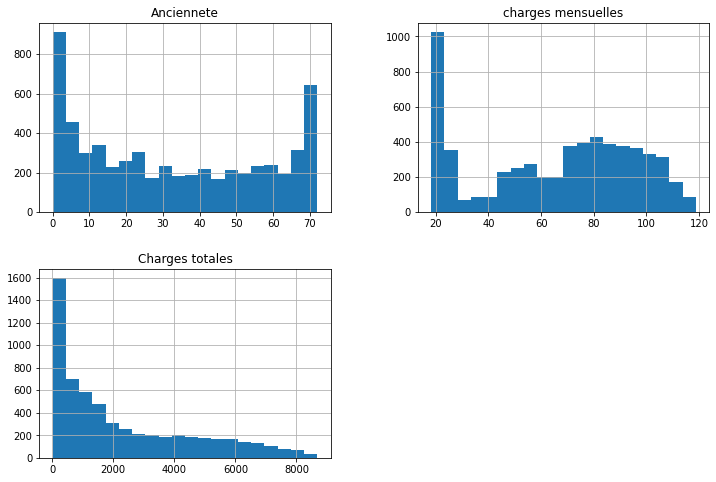

In [0]:
# Sélection des colonnes numériques
numerical_columns = ['Anciennete', 'charges mensuelles', 'Charges totales']

# Visualisation des histogrammes
telecom_df_imputed.select(numerical_columns).toPandas().hist(bins=20, figsize=(12, 8))
plt.show()

##### Diagrammes en violon pour les variables numériques

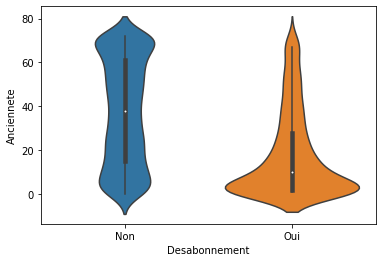

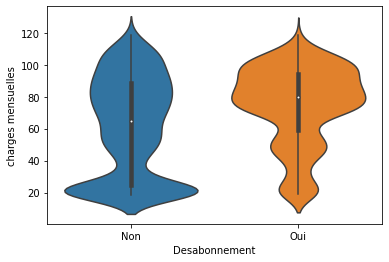

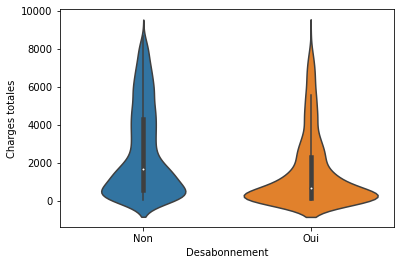

In [0]:
for col_name in numerical_columns:
    sns.violinplot(x="Desabonnement", y=col_name, data=telecom_df_imputed.toPandas())
    plt.show()

##### Pair Plots (matrice de dispersion) pour les variables numériques

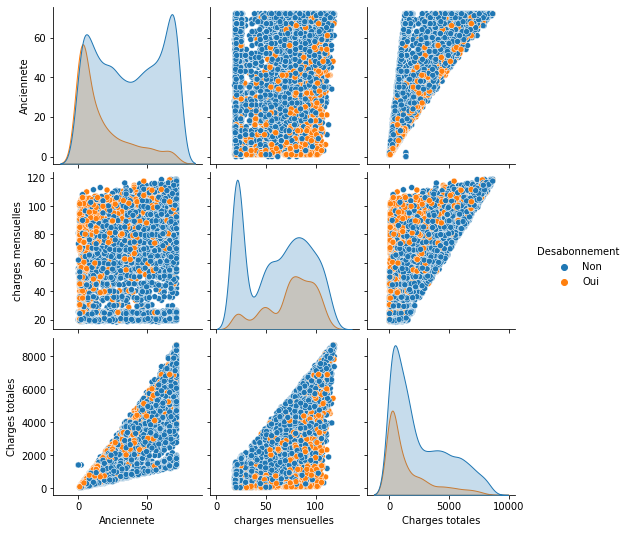

In [0]:
pair_plot_data = telecom_df_imputed.select(numerical_columns + ["Desabonnement"]).toPandas()
sns.pairplot(pair_plot_data, hue="Desabonnement")
plt.show()

##### Diagrammes en nuages de points pour les variables numériques importantes

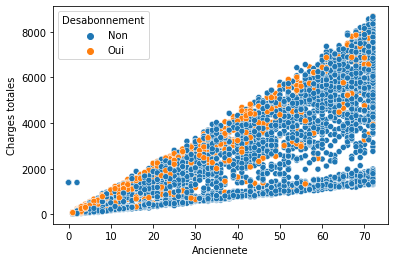

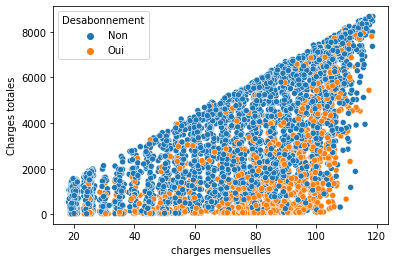

In [0]:
important_num_cols = ['Anciennete', 'charges mensuelles']
for col_name in important_num_cols:
    sns.scatterplot(x=col_name, y="Charges totales", hue="Desabonnement", data=telecom_df_imputed.toPandas())
    plt.show()

##### Visualisation de la distribution des variables catégorielles en fonction de la variable cible dans le but de visualiser la proportion de personnes désabonnées par genre, par type de service Internet, etc.

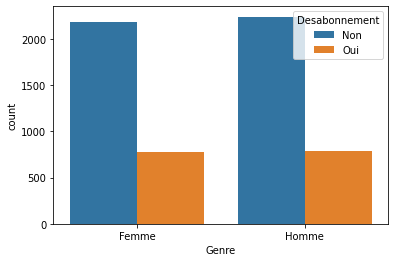

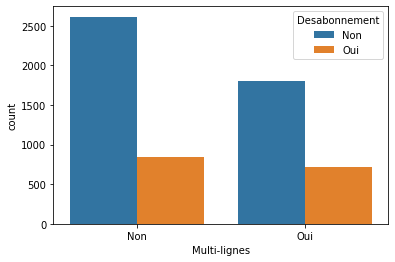

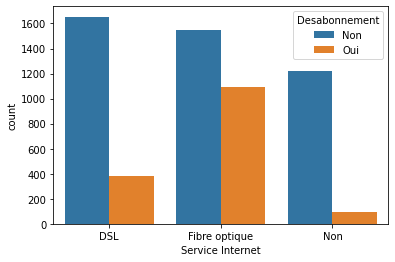

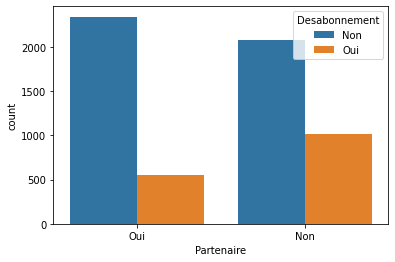

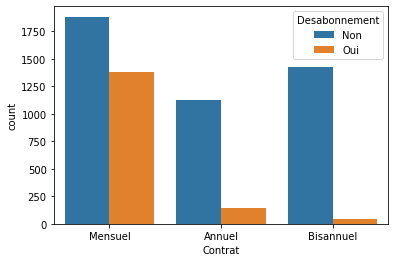

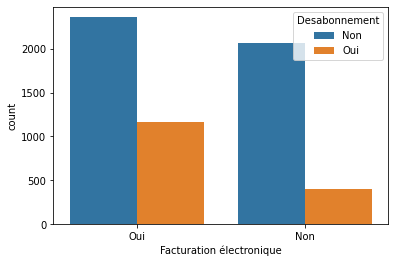

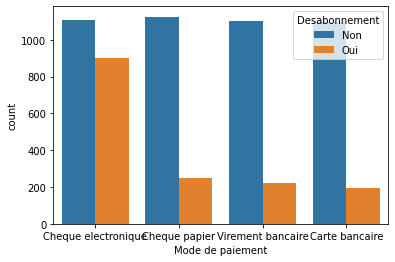

In [0]:
cat_cols = ['Genre', 'Multi-lignes', 'Service Internet', 'Partenaire', 'Contrat', 'Facturation électronique', 'Mode de paiement']
for col_name in cat_cols:
    sns.countplot(x=col_name, hue="Desabonnement", data=telecom_df_imputed.toPandas())
    plt.show()

##### Matrice de corrélation (uniquement pour les variables numériques) dans le but de voir les relations linéaires entre ces variables. Cela nous aidera à identifier des tendances potentielles.

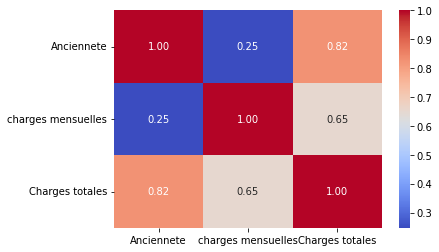

In [0]:
correlation_matrix = telecom_df_imputed.select(numerical_columns).toPandas().corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

##### Boxplot pour les variables numériques en fonction de la variable cible dans le but d'identifier des valeurs aberrantes et à comprendre les tendances dans les données.

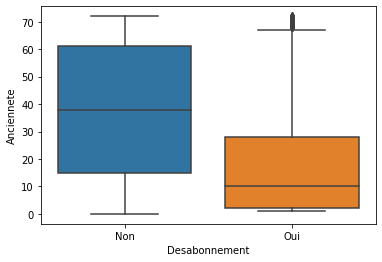

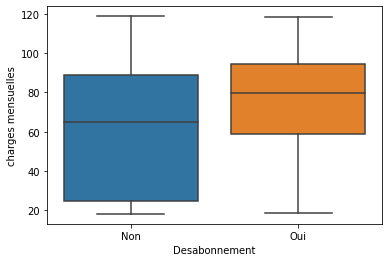

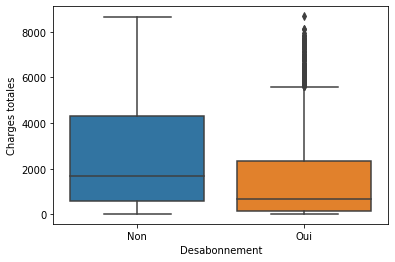

In [0]:

for col_name in numerical_columns:
    sns.boxplot(x="Desabonnement", y=col_name, data=telecom_df_imputed.toPandas())
    plt.show()

#### Brève explication de chaque colonne :
---

- **ID :** Identification de la ligne.

- **Genre :** Le genre du client (*Variable catégorielle nominale*).

- **Senior :** Indique si le client a 65 ans ou plus (0 pour Non, 1 pour Oui) (*Variable catégorielle binaire*).

- **Enfants :** Indique si le client a des enfants à charge (Non, Oui) (*Variable catégorielle binaire*).

- **Ancienneté :** Depuis combien de temps le client est client en mois (*Variable numérique continue*).

- **Multi-lignes :** Indique si le client a plusieurs lignes (Non, Oui) (*Variable catégorielle binaire*).

- **Service Internet :** Type de fourniture d'accès Internet du client (DSL, Fibre optique, Non) (*Variable catégorielle nominale*).

- **Autres Services :** Indique si le client dispose d'un autre service (Non, Oui) (*Variable catégorielle binaire*).

- **Partenaire :** Indique si le client a un partenaire (Non, Oui) (*Variable catégorielle binaire*).

- **Contrat :** Type de contrat (Mensuel, Annuel, etc.) (*Variable catégorielle nominale*).

- **Facturation électronique :** Indique si le client utilise la facturation électronique (Non, Oui) (*Variable catégorielle binaire*).

- **Mode de paiement :** Mode de paiement du client (Chèque électronique, Virement bancaire, etc.) (*Variable catégorielle nominale*).

- **Charges mensuelles :** Montant des frais mensuels (*Variable numérique continue*).

- **Charges totales :** Montant total des frais (*Variable numérique continue*).

- **Désabonnement :** Variable cible binaire indiquant si le client se désabonne (Non, Oui).


**Remarque** : Dans notre cas, nos variables catégorielles sont nominales (pas d'ordre intrinsèque), **OneHotEncoder** est plus adapté. 

#### Transformation du dataframe spark en RDD
Remarque: Problème lors de la transformation du dataframe spark en RDD ---> les autres étapes se feront avec le dataframme spark sans le RDD

#### Utilisation de OneHotEncoder sur mes colonnes categorielle & assemblage des colonnes encodées et des colonnes numérique afin de les afficher

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Liste des colonnes numériques
colonnes_numeriques = ['Anciennete', 'charges mensuelles', 'Charges totales', 'Senior']

# Liste des variables catégorielles
variables_categorielles = ['Genre', 'Enfants', 'Multi-lignes', 'Service Internet',
                           'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique',
                           'Mode de paiement', 'Desabonnement']

# Créer un objet StringIndexer pour chaque variable catégorielle
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in variables_categorielles]

# Créer un objet StringIndexer pour la variable cible "Desabonnement"
indexer_desabonnement = StringIndexer(inputCol="Desabonnement", outputCol="label")

# Créer un objet OneHotEncoder pour chaque variable catégorielle indexée
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded", dropLast=True) for col in variables_categorielles]

# Créer une liste de colonnes à utiliser dans le modèle
model_cols = [col + "_index" for col in variables_categorielles] + [col + "_encoded" for col in variables_categorielles] + colonnes_numeriques + ["label"]

# Créer le pipeline avec les étapes définies
pipeline = Pipeline(stages=indexers + [indexer_desabonnement] + encoders)

# Appliquer le pipeline sur le DataFrame
telecom_df_encoded = pipeline.fit(telecom_df_imputed).transform(telecom_df_imputed).select(model_cols)

# Afficher les premières lignes du DataFrame après l'encodage et la conversion de la colonne cible
telecom_df_encoded.show(5)


+-----------+-------------+------------------+----------------------+---------------------+----------------+-------------+------------------------------+----------------------+-------------------+-------------+---------------+--------------------+------------------------+-----------------------+------------------+---------------+--------------------------------+------------------------+---------------------+----------+------------------+---------------+------+-----+
|Genre_index|Enfants_index|Multi-lignes_index|Service Internet_index|Autres Services_index|Partenaire_index|Contrat_index|Facturation électronique_index|Mode de paiement_index|Desabonnement_index|Genre_encoded|Enfants_encoded|Multi-lignes_encoded|Service Internet_encoded|Autres Services_encoded|Partenaire_encoded|Contrat_encoded|Facturation électronique_encoded|Mode de paiement_encoded|Desabonnement_encoded|Anciennete|charges mensuelles|Charges totales|Senior|label|
+-----------+-------------+------------------+------------

#### Conservation des colones utiles à notre analyse

In [0]:
# Créer une liste de colonnes à utiliser dans le modèle
model_cols = [col + "_index" for col in variables_categorielles] + [col + "_encoded" for col in variables_categorielles] + colonnes_numeriques + ["label"]

# Liste des colonnes catégorielles d'origine
original_categorical_columns = ['Genre', 'Enfants', 'Multi-lignes', 'Service Internet',
                                 'Autres Services', 'Partenaire', 'Contrat', 'Facturation électronique',
                                 'Mode de paiement']

# Créer une liste de colonnes à conserver
columns_to_keep = ['label','Anciennete', 'charges mensuelles', 'Charges totales', 'Senior'] + [col + "_encoded" for col in original_categorical_columns]

# Sélectionner uniquement les colonnes à conserver
telecom_df_encoded_selected = telecom_df_encoded.select(columns_to_keep)

# Afficher le DataFrame résultant
telecom_df_encoded_selected.show(5)

+-----+----------+------------------+---------------+------+-------------+---------------+--------------------+------------------------+-----------------------+------------------+---------------+--------------------------------+------------------------+
|label|Anciennete|charges mensuelles|Charges totales|Senior|Genre_encoded|Enfants_encoded|Multi-lignes_encoded|Service Internet_encoded|Autres Services_encoded|Partenaire_encoded|Contrat_encoded|Facturation électronique_encoded|Mode de paiement_encoded|
+-----+----------+------------------+---------------+------+-------------+---------------+--------------------+------------------------+-----------------------+------------------+---------------+--------------------------------+------------------------+
|  0.0|         1|             29.85|          29.85|     0|    (1,[],[])|  (1,[0],[1.0])|       (1,[0],[1.0])|           (2,[1],[1.0])|              (1,[],[])|         (1,[],[])|  (2,[0],[1.0])|                   (1,[0],[1.0])|          

In [0]:
# Afficher le schéma mis à jour
telecom_df_encoded_selected.printSchema()

root
 |-- label: double (nullable = false)
 |-- Anciennete: integer (nullable = true)
 |-- charges mensuelles: float (nullable = true)
 |-- Charges totales: float (nullable = true)
 |-- Senior: integer (nullable = true)
 |-- Genre_encoded: vector (nullable = true)
 |-- Enfants_encoded: vector (nullable = true)
 |-- Multi-lignes_encoded: vector (nullable = true)
 |-- Service Internet_encoded: vector (nullable = true)
 |-- Autres Services_encoded: vector (nullable = true)
 |-- Partenaire_encoded: vector (nullable = true)
 |-- Contrat_encoded: vector (nullable = true)
 |-- Facturation électronique_encoded: vector (nullable = true)
 |-- Mode de paiement_encoded: vector (nullable = true)



#### Séparation des données

In [0]:
# Diviser le DataFrame en ensembles d'entraînement et de test
training_data, test_data = telecom_df_standardized.randomSplit([0.8, 0.2], seed=42)


#### Comparaison des Modèles de Classification

##### Régression Logistique & Naive Bayes & SVM (Linear Support Vector Machine) & RandomForestClassifier & GBTClassifier

- Création et entraînement du modèle
- Faire des prédictions sur l'ensemble de test
- Évaluation des performances du modèle

##### Meilleur Modèle

- Comparaison des performances des cinq modèles
- Afficher le meilleur modèle en fonction de la précision ou de l'aire sous la courbe ROC


In [0]:
from pyspark.ml.classification import LogisticRegression, NaiveBayes, LinearSVC, RandomForestClassifier, GBTClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Liste des colonnes de caractéristiques
feature_cols = ['Genre_encoded', 'Senior', 'Enfants_encoded', 'Anciennete', 'Multi-lignes_encoded', 'Service Internet_encoded', 'Autres Services_encoded', 'Partenaire_encoded', 'Contrat_encoded', 'Facturation électronique_encoded', 'Mode de paiement_encoded', 'charges mensuelles', 'Charges totales']

# Créer un assembleur de vecteurs
assembler = VectorAssembler(inputCols=feature_cols, outputCol="my_features")

# Assembler les features pour l'ensemble d'entraînement
training_data = assembler.transform(training_data)

# Assembler les features pour l'ensemble de test
test_data = assembler.transform(test_data)

# -----------------------------
# Modèle de Régression Logistique
# -----------------------------

# Créer et entraîner un modèle de régression logistique
lr_model = LogisticRegression(featuresCol="my_features", labelCol="label")
lr_model = lr_model.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions_lr = lr_model.transform(test_data)

# Évaluer les performances du modèle de régression logistique
evaluator_lr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_lr = evaluator_lr.evaluate(predictions_lr)
print("Accuracy Logistic Regression:", accuracy_lr)

# -----------------------------
# Modèle Naive Bayes
# -----------------------------

# Créer et entraîner un modèle Naive Bayes
nb_model = NaiveBayes(featuresCol="my_features", labelCol="label")
nb_model = nb_model.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions_nb = nb_model.transform(test_data)

# Évaluer les performances du modèle Naive Bayes
evaluator_nb = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_nb = evaluator_nb.evaluate(predictions_nb)
print("Accuracy Naive Bayes:", accuracy_nb)

# -----------------------------
# Modèle SVM (Linear Support Vector Machine)
# -----------------------------

# Créer et entraîner un modèle SVM
svm_model = LinearSVC(featuresCol="my_features", labelCol="label", maxIter=10)
svm_model = svm_model.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions_svm = svm_model.transform(test_data)

# Évaluer les performances du modèle SVM
evaluator_svm = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC")
area_under_roc_svm = evaluator_svm.evaluate(predictions_svm)
print("Area Under ROC SVM:", area_under_roc_svm)

# -----------------------------
# Modèle RandomForestClassifier
# -----------------------------

# Créer et entraîner un modèle RandomForestClassifier
rf_model = RandomForestClassifier(featuresCol="my_features", labelCol="label")
rf_model = rf_model.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions_rf = rf_model.transform(test_data)

# Évaluer les performances du modèle RandomForestClassifier
evaluator_rf = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_rf = evaluator_rf.evaluate(predictions_rf)
print("Accuracy RandomForestClassifier:", accuracy_rf)

# -----------------------------
# Modèle GBTClassifier
# -----------------------------

# Créer et entraîner un modèle GBTClassifier
gbt_model = GBTClassifier(featuresCol="my_features", labelCol="label")
gbt_model = gbt_model.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions_gbt = gbt_model.transform(test_data)

# Évaluer les performances du modèle GBTClassifier
evaluator_gbt = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_gbt = evaluator_gbt.evaluate(predictions_gbt)
print("Accuracy GBTClassifier:", accuracy_gbt)

# Afficher le meilleur modèle
best_model = max([
    (accuracy_lr, "Logistic Regression"),
    (accuracy_nb, "Naive Bayes"),
    (area_under_roc_svm, "SVM"),
    (accuracy_rf, "RandomForestClassifier"),
    (accuracy_gbt, "GBTClassifier")
], key=lambda x: x[0])
print(f"Meilleur modèle : {best_model[1]} avec une précision/aire sous la courbe ROC de {best_model[0]}")


Accuracy Logistic Regression: 0.8217391304347826
Accuracy Naive Bayes: 0.6843478260869565
Area Under ROC SVM: 0.8441041572482301
Accuracy RandomForestClassifier: 0.8121739130434783
Accuracy GBTClassifier: 0.8060869565217391
Meilleur modèle : SVM avec une précision/aire sous la courbe ROC de 0.8441041572482301


#### Turning des hyperparamètres pour les 2 meilleurs modèles avec GridSearch

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Définition des modèles
lr = LogisticRegression(featuresCol="my_features", labelCol="label")
svm = LinearSVC(featuresCol="my_features", labelCol="label", maxIter=10)

# Définition de la grille des hyperparamètres pour chaque modèle
param_grid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .addGrid(lr.maxIter, [10, 20, 30]) \
    .build()

param_grid_svm = ParamGridBuilder() \
    .addGrid(svm.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(svm.maxIter, [10, 20, 30]) \
    .build()

# Utilisation de la validation croisée avec 3 plis pour chaque modèle
cross_val_lr = CrossValidator(estimator=lr,
                              estimatorParamMaps=param_grid_lr,
                              evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy"),
                              numFolds=3)

cross_val_svm = CrossValidator(estimator=svm,
                               estimatorParamMaps=param_grid_svm,
                               evaluator=BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC"),
                               numFolds=3)

# Entraîner les modèles avec la validation croisée
cv_model_lr = cross_val_lr.fit(training_data)
cv_model_svm = cross_val_svm.fit(training_data)

# Affichage des meilleurs hyperparamètres pour chaque modèle
best_model_lr = cv_model_lr.bestModel
best_model_svm = cv_model_svm.bestModel

print(f"Best Logistic Regression Model Hyperparameters:\n{best_model_lr.extractParamMap()}")
print(f"Best Linear SVM Model Hyperparameters:\n{best_model_svm.extractParamMap()}")

# Créer un évaluateur de classification multiclasse pour le modèle Logistic Regression
evaluator_lr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Créer un évaluateur de classification binaire pour le modèle Linear SVM
evaluator_svm = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Faire des prédictions sur l'ensemble de test
predictions_lr = cv_model_lr.transform(test_data)
predictions_svm = cv_model_svm.transform(test_data)

# Évaluer les performances des modèles
accuracy_lr = evaluator_lr.evaluate(predictions_lr)
area_under_roc_svm = evaluator_svm.evaluate(predictions_svm)

print(f"Accuracy Logistic Regression: {accuracy_lr}")
print(f"Area Under ROC Linear SVM: {area_under_roc_svm}")


Best Logistic Regression Model Hyperparameters:
{Param(parent='LogisticRegression_8fb021301e83', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_8fb021301e83', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_8fb021301e83', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_8fb021301e83', name='featuresCol', doc='features column name.'): 'my_features', Param(parent='LogisticRegression_8fb021301e83', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_8fb021301e83', name='labelCol', doc='label column name.'): 'label', Param(parent='LogisticRegression_8fb021301e83', name='maxBl

Sans standardiser les données, nous avons obtenu les résultats suivants :

- Accuracy Logistic Regression: 0.8217391304347826
- Accuracy Naive Bayes: 0.6843478260869565
- Area Under ROC SVM: 0.8441041572482301
- Accuracy RandomForestClassifier: 0.8121739130434783
- Accuracy GBTClassifier: 0.8060869565217391

Le meilleur modèle était le SVM avec une précision et une aire sous la courbe ROC de 0.8441041572482301.

Nous avons choisi les deux meilleurs modèles (Logistic Regression et Linear SVM) pour effectuer un tuning des hyperparamètres. Voici les résultats obtenus après ce processus :

- Accuracy Logistic Regression: 0.8121739130434783
- Area Under ROC Linear SVM: 0.8424465129578322


#### Utilisation de la bibliothèque pickle de Python pour enregistrer les meilleurs modèles

In [0]:
from pyspark.ml.classification import LogisticRegressionModel, LinearSVCModel

# Sauvegarder le meilleur modèle Logistic Regression au format pickle
best_model_lr.write().overwrite().save("/dbfs/FileStore/best_logistic_regression_model")

# Sauvegarder le meilleur modèle Linear SVM au format pickle
best_model_svm.write().overwrite().save("/dbfs/FileStore/best_linear_svm_model")

# Charger le modèle Linear SVM à partir du fichier pickle
loaded_svm_model = LinearSVCModel.load("/dbfs/FileStore/best_linear_svm_model")
